In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [43]:
df=pd.read_csv("linsep.txt",sep=",",header=None)
df


,0,1,2
0,0.841958,0.850168,1
1,0.233077,0.868845,-1
2,0.239182,0.815853,-1
3,0.934774,0.657329,1
4,0.998767,0.324128,1
...,...,...,...
95,0.679815,0.904680,1
96,0.617873,0.416534,1
97,0.779193,0.989354,1
98,0.689667,0.721418,1


In [44]:
x=df.drop(columns=2)
x

,0,1
0,0.841958,0.850168
1,0.233077,0.868845
2,0.239182,0.815853
3,0.934774,0.657329
4,0.998767,0.324128
...,...,...
95,0.679815,0.904680
96,0.617873,0.416534
97,0.779193,0.989354
98,0.689667,0.721418


In [45]:
y=df[2]
y


0     1
1    -1
2    -1
3     1
4     1
     ..
95    1
96    1
97    1
98    1
99    1
Name: 2, Length: 100, dtype: int64

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

In [144]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear',C=100)
svclassifier.fit(X_train, y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [145]:
y_pred = svclassifier.predict(X_test)


In [146]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[ 3  0]
 [ 0 17]]
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00         3
           1       1.00      1.00      1.00        17

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [147]:
print('weights: ')
print(svclassifier.coef_)
print('Intercept: ')
print(svclassifier.intercept_)

weights: 
[[ 7.45838668 -3.3139653 ]]
Intercept: 
[-0.25902653]


In [148]:
svclassifier.support_vectors_

array([[0.02066458, 0.27003158],
       [0.17422964, 0.6157447 ],
       [0.24979414, 0.18230306]])

In [151]:
X,y=X_train, y_train

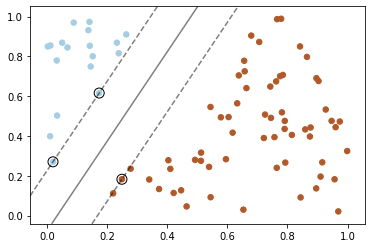

In [153]:

plt.scatter(X[0], X[1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 50)
yy = np.linspace(ylim[0], ylim[1], 50)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svclassifier.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(svclassifier.support_vectors_[:, 0], svclassifier.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

In [184]:
dfnonlin=pd.read_csv("nonlinsep.txt",sep=",",header=None)
dfnonlin=dfnonlin.sample(frac=1).reset_index(drop=True)
dfnonlin

,0,1,2
0,0.449463,8.412922,-1
1,-15.647197,3.320391,1
2,7.463907,-21.940785,1
3,12.092888,-11.652837,1
4,1.316995,-5.382748,-1
...,...,...,...
95,-24.889431,4.624484,1
96,4.272900,8.670794,-1
97,-22.638147,6.104174,1
98,-6.800023,-7.023843,-1


In [185]:
x=dfnonlin.drop(columns=2)
x

,0,1
0,0.449463,8.412922
1,-15.647197,3.320391
2,7.463907,-21.940785
3,12.092888,-11.652837
4,1.316995,-5.382748
...,...,...
95,-24.889431,4.624484
96,4.272900,8.670794
97,-22.638147,6.104174
98,-6.800023,-7.023843


In [186]:
y=dfnonlin[2]
y


0    -1
1     1
2     1
3     1
4    -1
     ..
95    1
96   -1
97    1
98   -1
99   -1
Name: 2, Length: 100, dtype: int64

In [187]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

In [188]:
from sklearn.svm import SVC
svclassifierpoly = SVC(kernel='poly', degree=2,C=1000)
svclassifierpoly.fit(X_train, y_train)

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [189]:
y_pred = svclassifierpoly.predict(X_test)


In [190]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[12  0]
 [ 0  8]]
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [191]:
svclassifierpoly.support_vectors_

array([[ -8.47422847,   5.15621613],
       [  9.90143538,  -0.31483149],
       [ -6.80002274,  -7.02384335],
       [  9.67917724,   4.3759541 ],
       [-10.260969  ,   2.07391791],
       [  1.3393313 , -10.29098822]])

In [192]:
print('Intercept: ')
print(svclassifierpoly.intercept_)

Intercept: 
[-13.59526067]


In [193]:
# print('weights: ')
# print(svclassifierpoly.coef_)


In [194]:
X,y=X_train, y_train

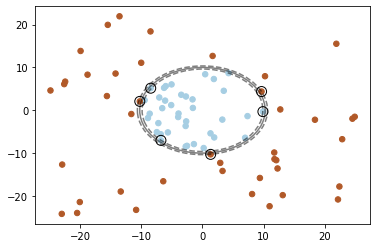

In [207]:

plt.scatter(X[0], X[1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 50)
yy = np.linspace(ylim[0], ylim[1], 50)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svclassifierpoly.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(svclassifierpoly.support_vectors_[:, 0], svclassifierpoly.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

